Data source - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality
issues, we cannot provide the original features and more background information about the data. 
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed 
with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and 
the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for 
example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud 
and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 
Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset CSV file
df = pd.read_csv(r"C:\Users\HP\Documents\Data science 2\Capstone Projects\creditcard.csv")

In [4]:
# Displaying the dataset
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# displays the first 5 rows of the dataset
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time can be in mins or secs
V1 to V28, these columns are the result of PCA
Amount is the amount collected and it is in the form of Euros
Class - 0 means non-fraudulent, 1 means fraudulent

In [7]:
# Displaying number of rows and columns in the dataset
df.shape

(284807, 31)

In [8]:
# displays all the counts with the datatype of each column
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Checking for null values
df.isnull().sum()               

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values found in the dataset

In [11]:
# Statistical details
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# Count of unique value in the column
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
# Finding the duplicates in the dataset
df.duplicated().sum()   

1081

In [14]:
# removing the duplicate records from the dataset
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
# Displaying number of rows and columns in the dataset
df.shape

(283726, 31)

In [17]:
# Count of unique value in the column
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

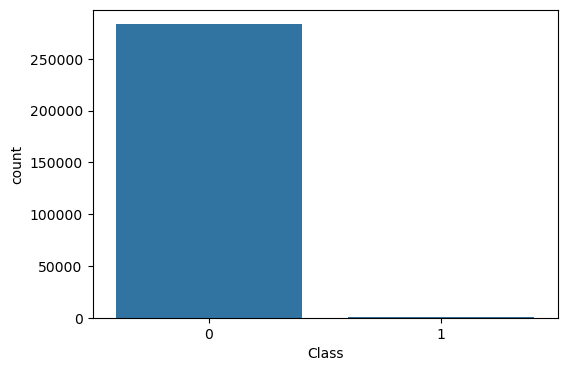

In [18]:
# Plotting the target column
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)

In [19]:
# Creating a dataframe containing V1 to V28 columns
df_temp=df.drop(['Time','Amount','Class'], axis=1)

In [20]:
# Displaying first five records of the dataframe
df_temp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


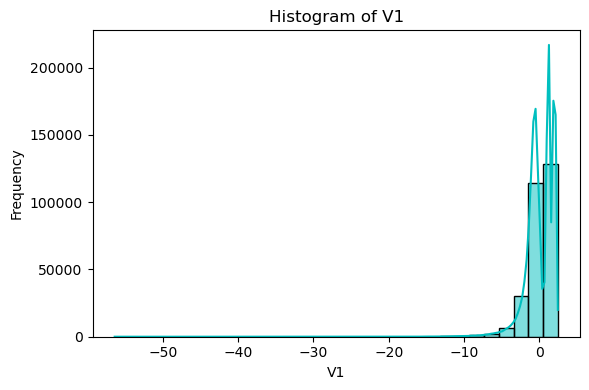

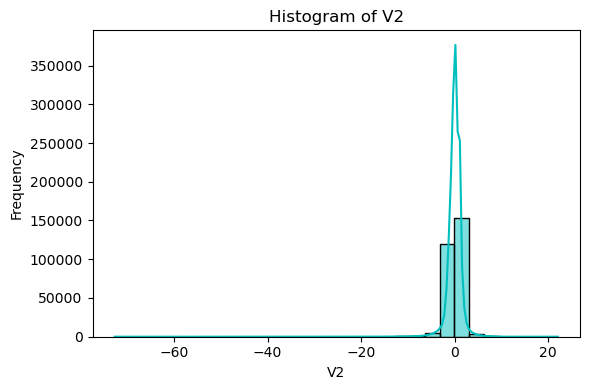

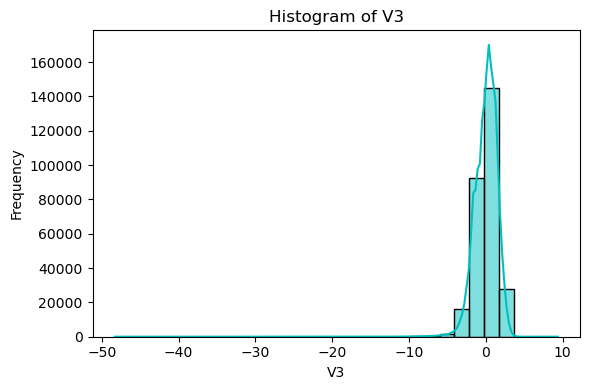

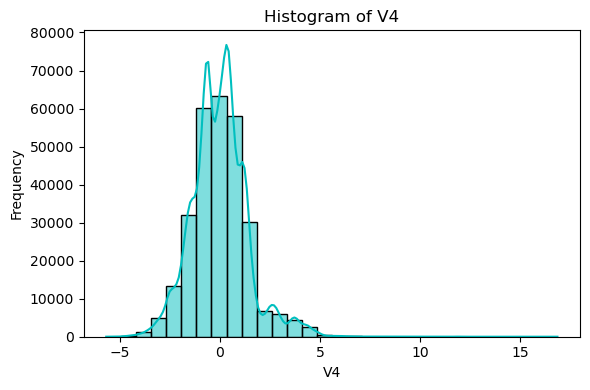

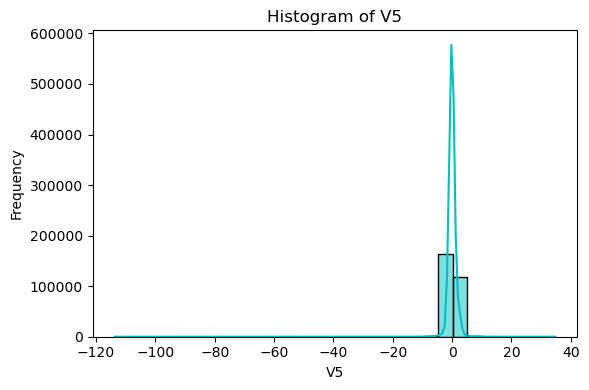

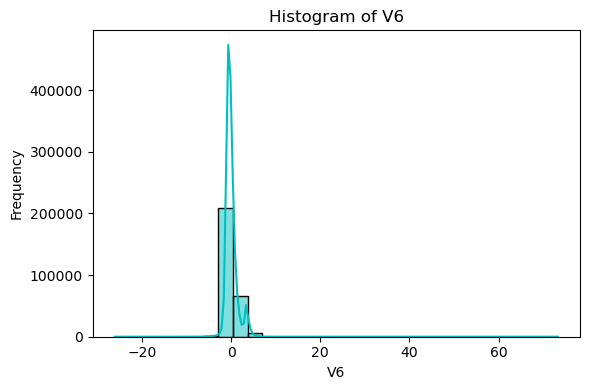

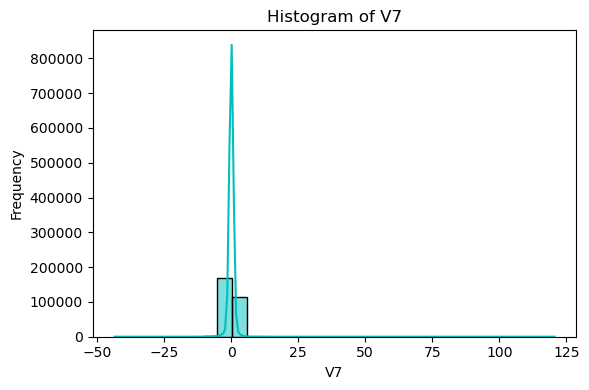

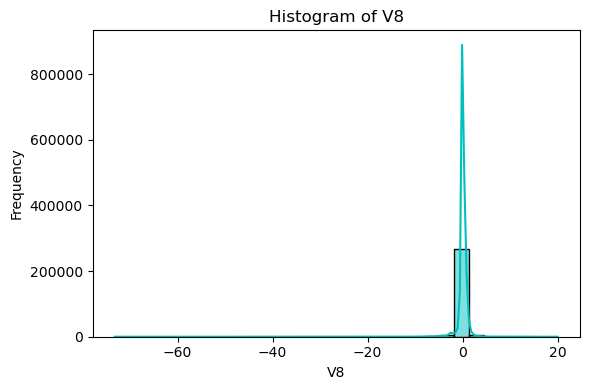

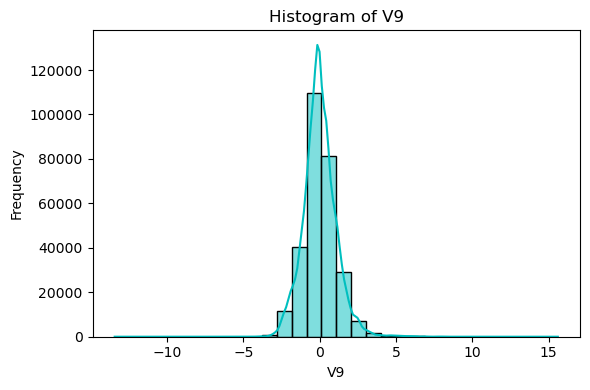

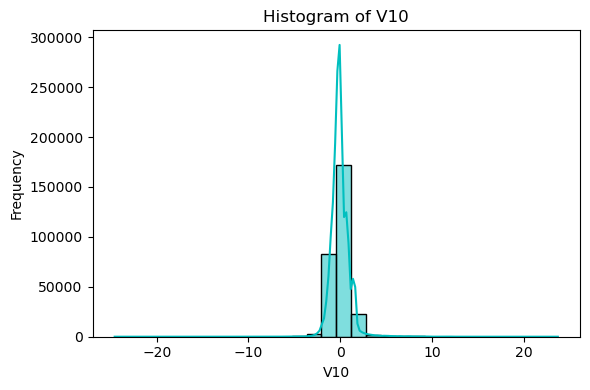

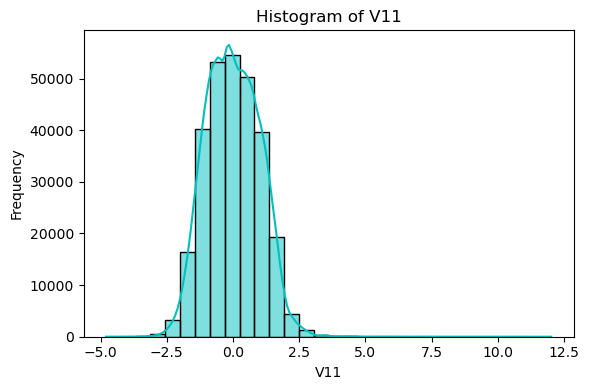

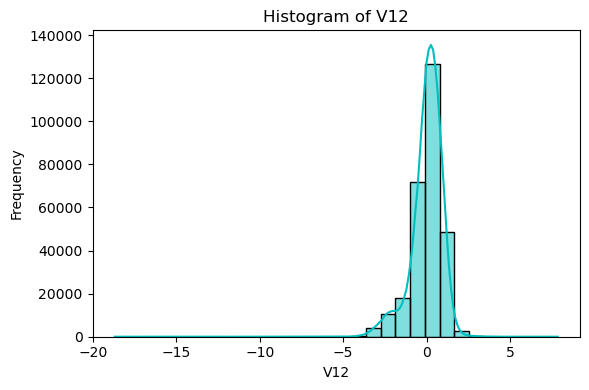

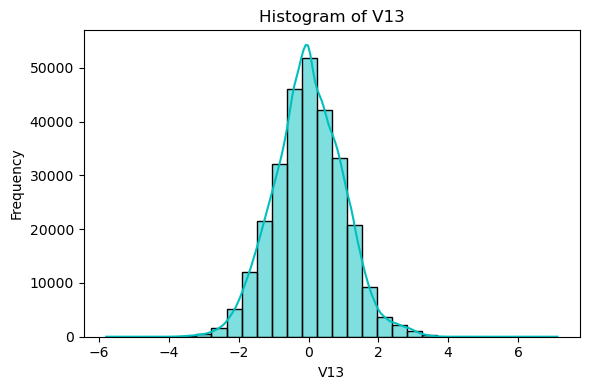

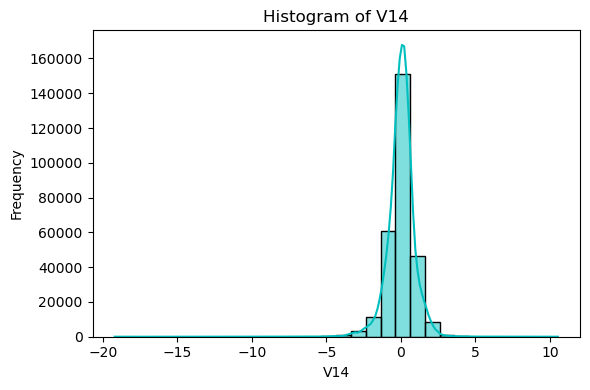

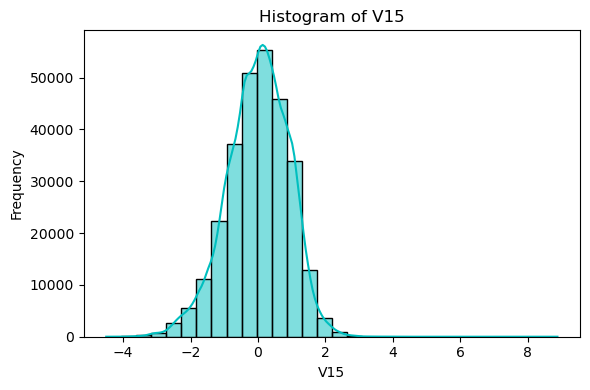

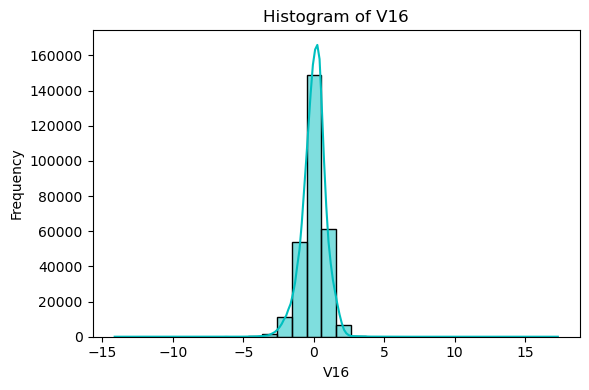

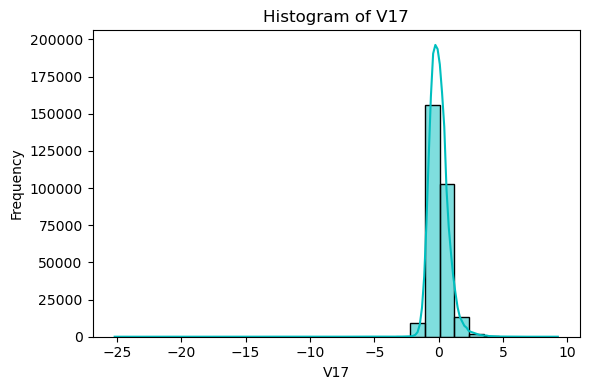

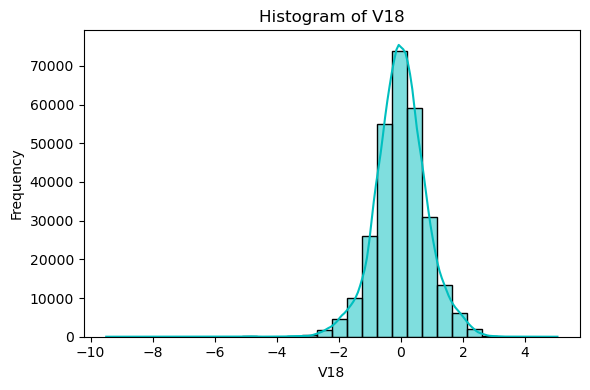

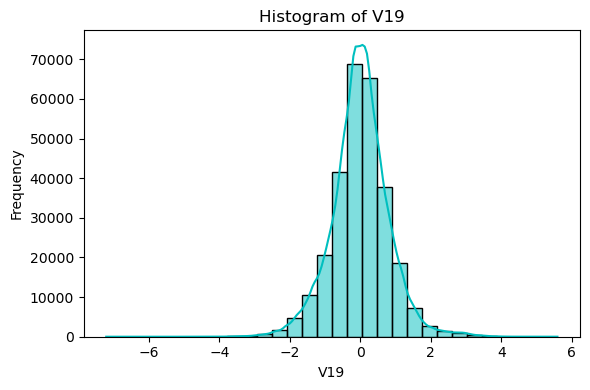

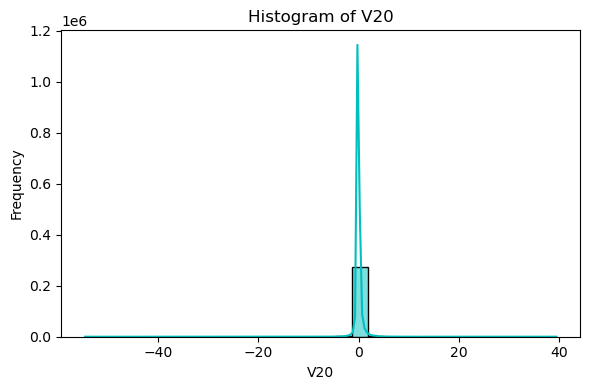

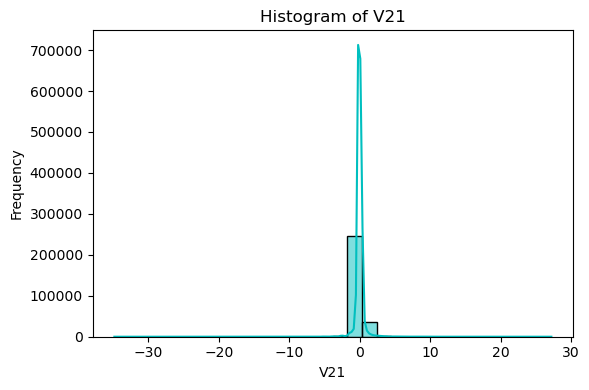

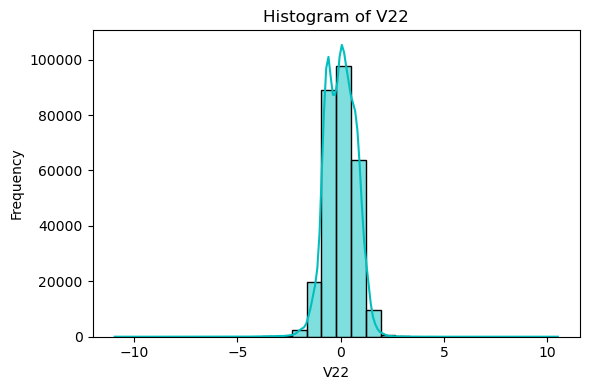

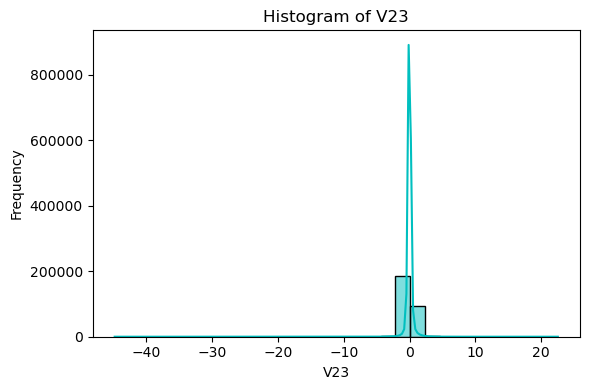

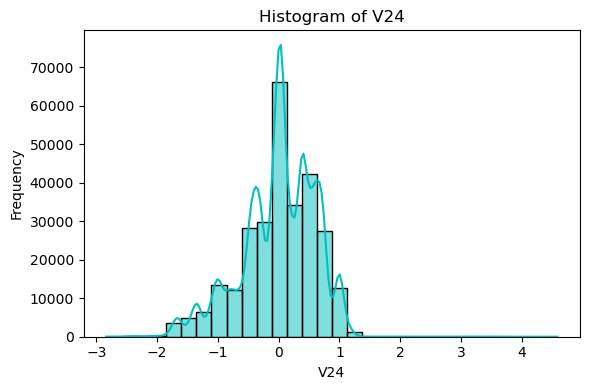

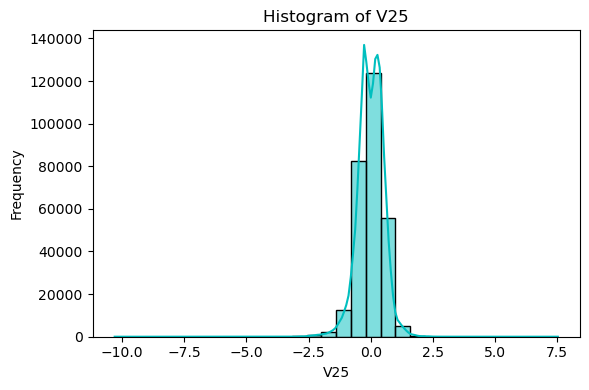

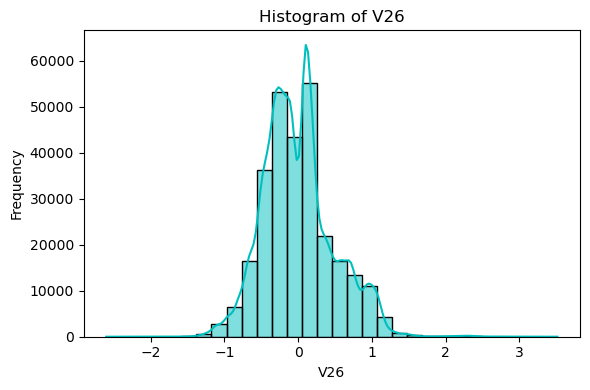

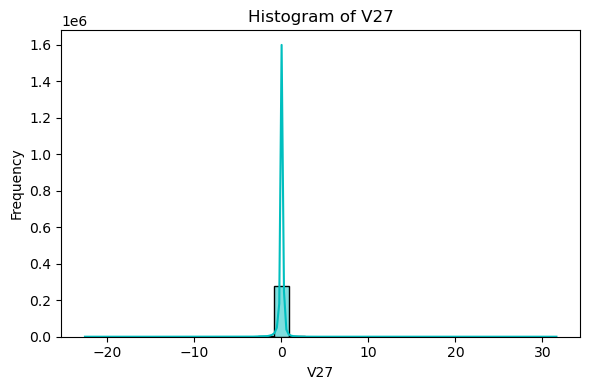

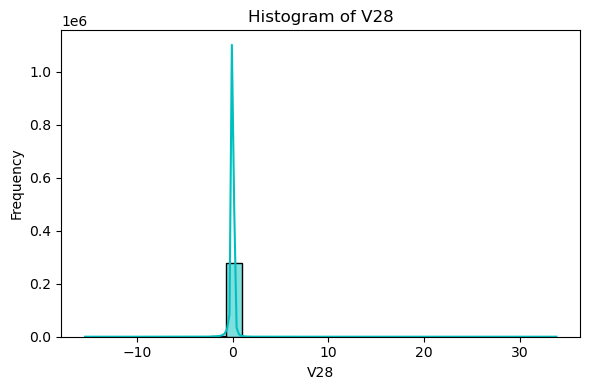

In [21]:
# to understand data distribution, to check if the V1 to V28 attributes are normally distributed and are not skewed
for i in df_temp:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_temp[i], color='c', kde=True, bins=30)
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### The range of the value for V1 to V28 columns are from -20 to 25, so we need to apply Standard scaler

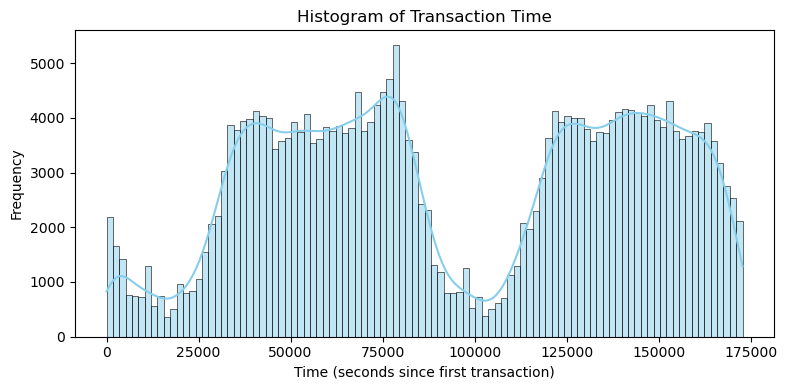

In [23]:
# to plot the Time column to see the distribtion range 
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Time', bins=100, color='skyblue', kde=True)
plt.title('Histogram of Transaction Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')            # Y = how many transactions occurred in each time range
plt.tight_layout() 
plt.show()

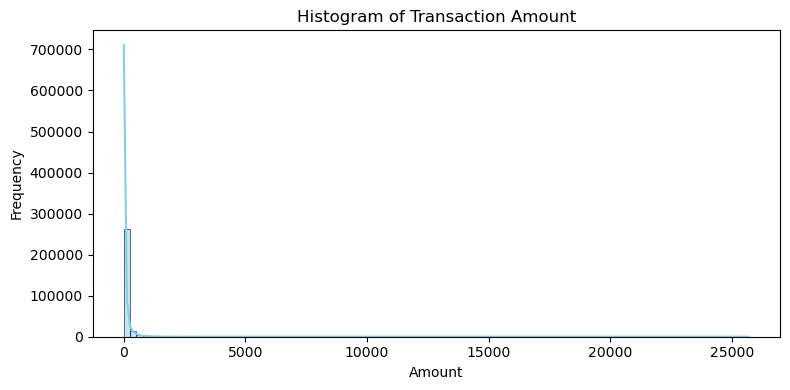

In [24]:
# to plot the Amount column to see the distribtion range
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Amount', bins=100, color='skyblue', kde=True)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

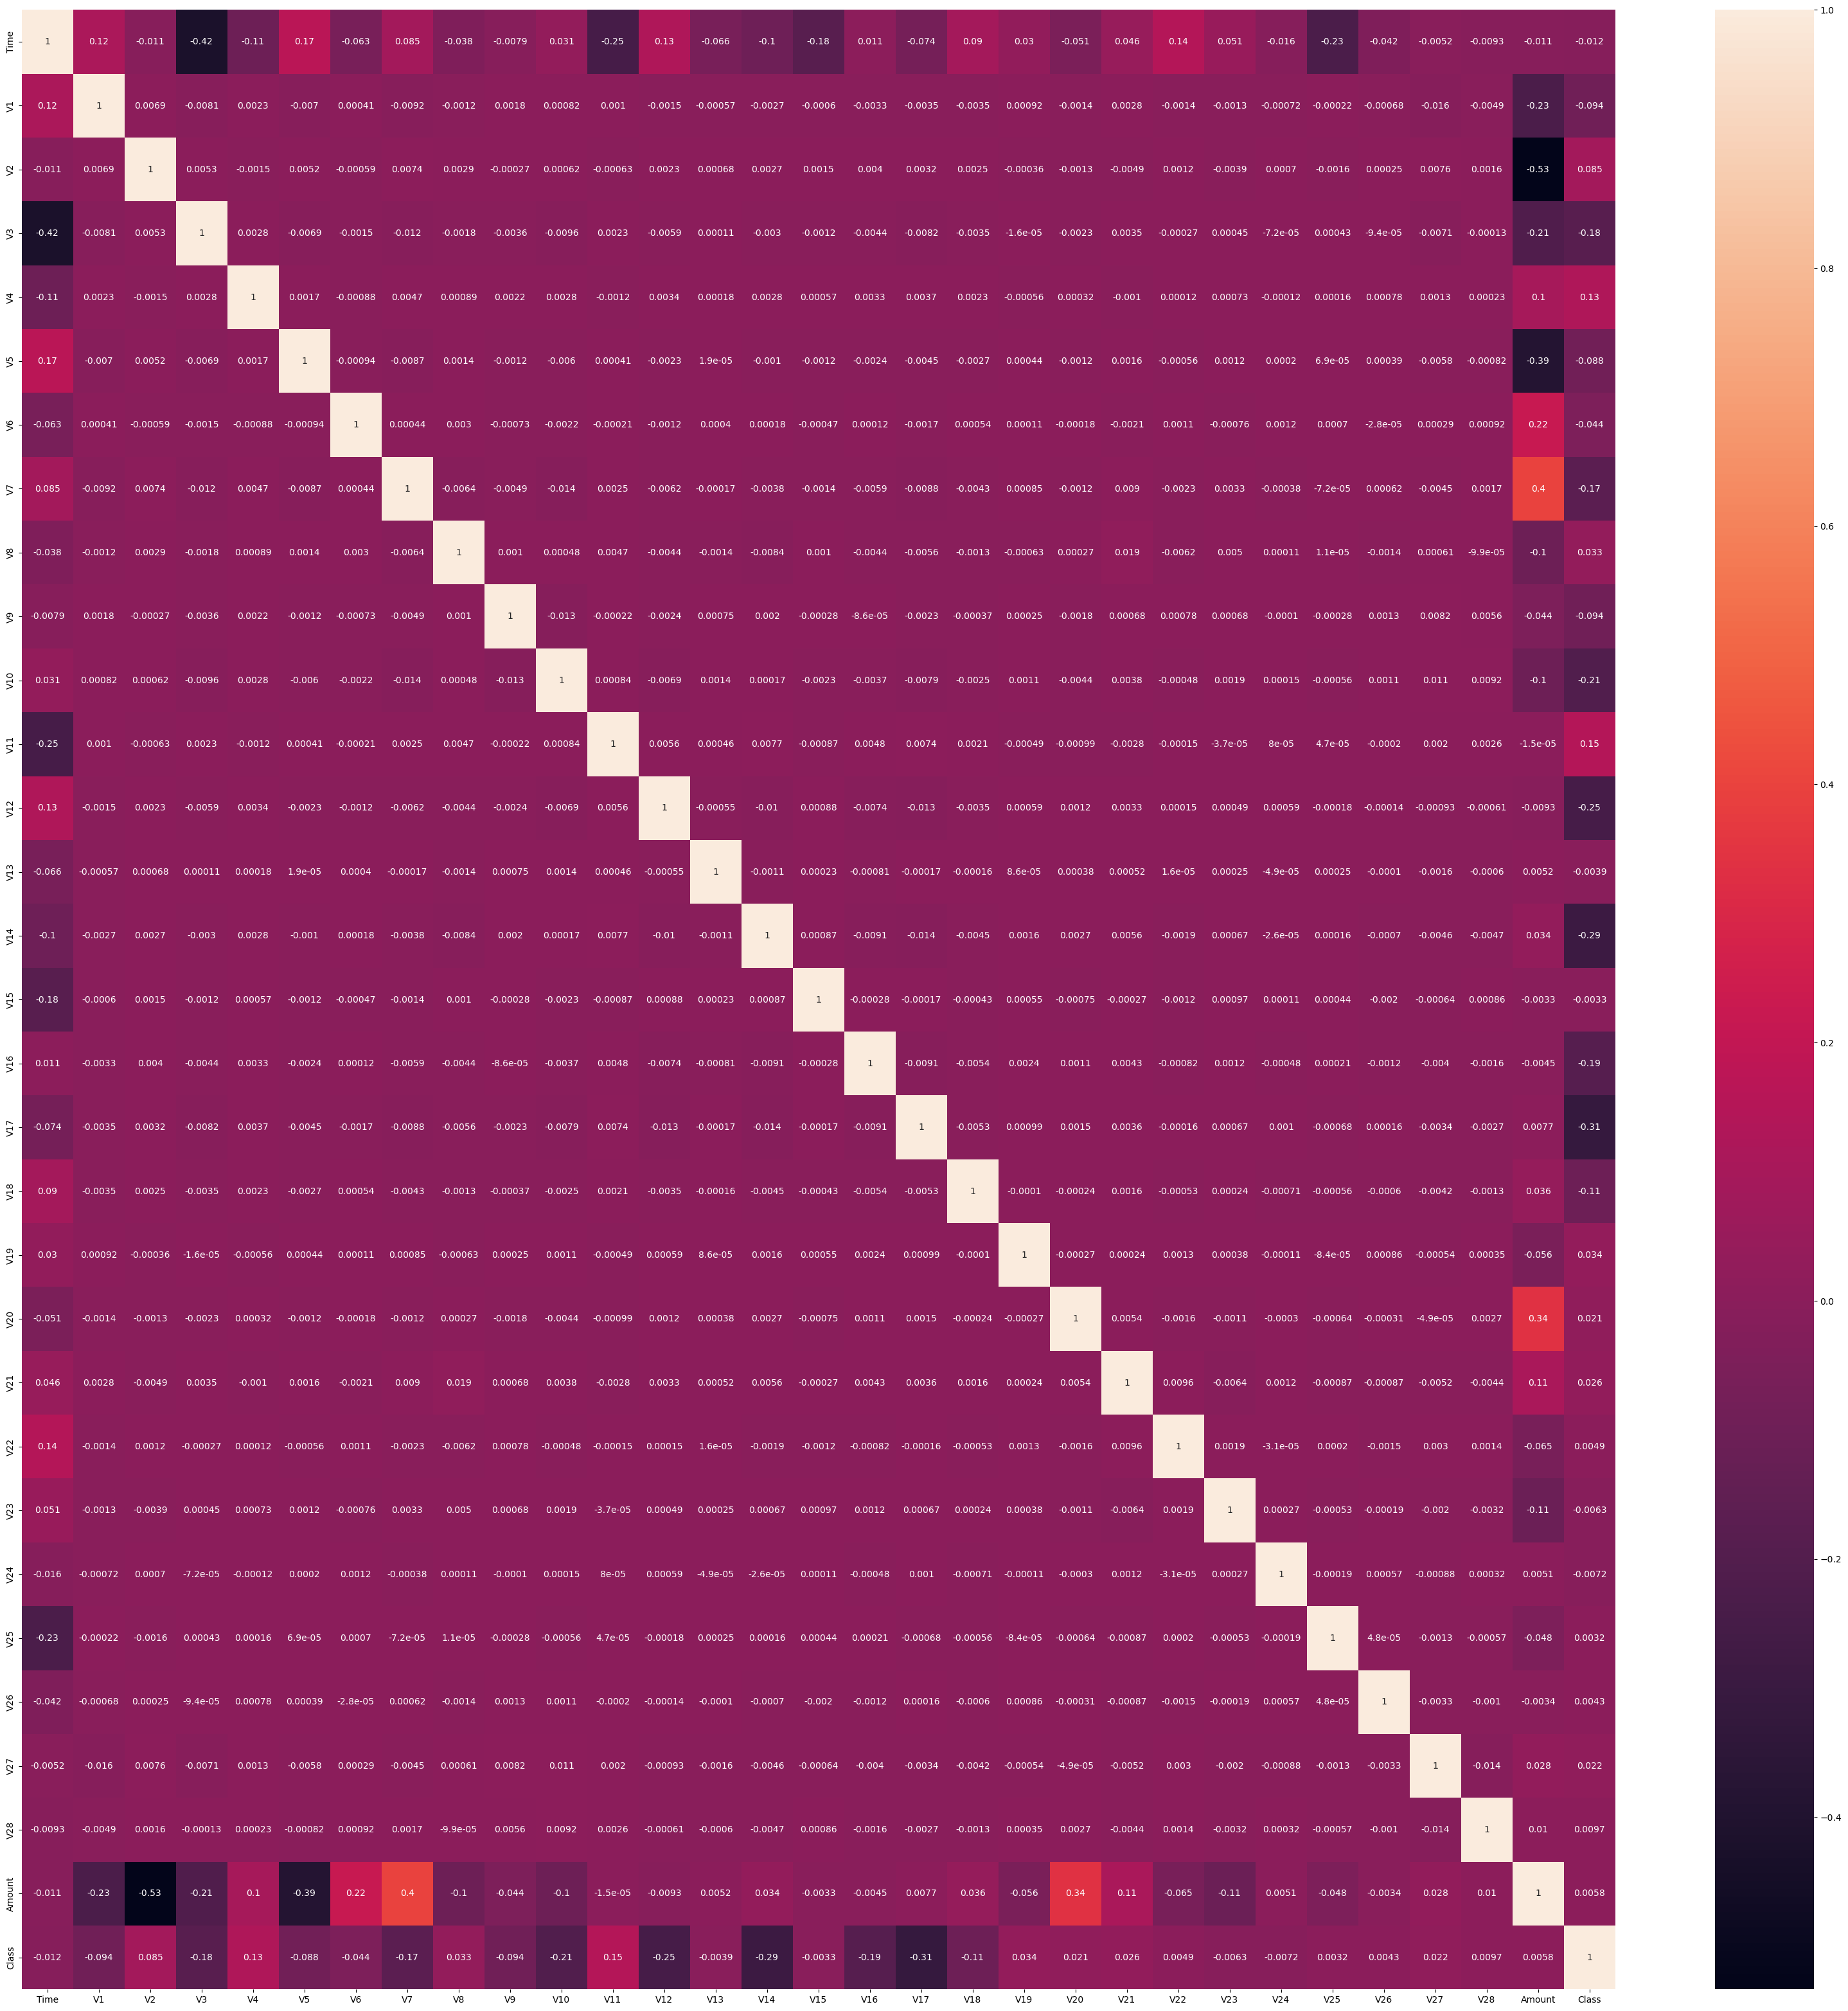

In [25]:
# Checking multi-collinearity between the numerical columns
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot= True)
plt.show()

### Here, we do not have any high correlations between any of the numeric coulmns

In [27]:
# X independent/input columns dataframe
X=df.drop(['Class'], axis=1)

In [28]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [29]:
# Target column
y=df['Class']

In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [31]:
# converting X and y dataframes to arrays for fast computation
X=X.values
y=y.values

In [32]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [33]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
# Scale the values in the range -3 to +3 using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [35]:
X

array([[-1.99682292, -0.70108232, -0.04168726, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678, ..., -0.14432548,
        -0.18382429,  1.15889967],
       ...,
       [ 1.64227757,  0.98235398, -0.18043304, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [ 1.64227757, -0.12646526,  0.32465977, ...,  0.27052318,
         0.31700384, -0.31339058],
       [ 1.64236181, -0.27686005, -0.1127094 , ..., -0.01055821,
         0.03994074,  0.51329005]])

In [36]:
# Splitting the data for training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [37]:
# Applying SMOTE
print("Before OverSampling, counts of label '1': ", (sum(y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)      # it is a fit transform
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(y_train_res == 0)))

Before OverSampling, counts of label '1':  343
Before OverSampling, counts of label '0':  198265


C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

After OverSampling, the shape of train_X:  (396530, 30)
After OverSampling, the shape of train_y:  (396530,)
After OverSampling, counts of label '1':  198265
After OverSampling, counts of label '0':  198265


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_res,y_train_res)
y_train_predicted=model.predict(X_train_res)
y_test_predicted=model.predict(X_test)  # gives the final class label (0 or 1), usually the one with the highest probability

In [40]:
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# gives probabilities of each class
predicted_proba=model.predict_proba(X_test)    
predicted_proba

array([[0.96859281, 0.03140719],
       [0.83174628, 0.16825372],
       [0.9989034 , 0.0010966 ],
       ...,
       [0.97513521, 0.02486479],
       [0.92425472, 0.07574528],
       [0.70621732, 0.29378268]])

In [42]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix
# For training data
print("Model Performance")
print("Training accuracy", accuracy_score(y_train_res,y_train_predicted))
print("Training precision", precision_score(y_train_res,y_train_predicted))
print("Training recall", recall_score(y_train_res,y_train_predicted))
print(confusion_matrix(y_train_res,y_train_predicted))
print(classification_report(y_train_res,y_train_predicted))

Model Performance
Training accuracy 0.9474112929664843
Training precision 0.9737606682404213
Training recall 0.9196025521398129
[[193352   4913]
 [ 15940 182325]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    198265
           1       0.97      0.92      0.95    198265

    accuracy                           0.95    396530
   macro avg       0.95      0.95      0.95    396530
weighted avg       0.95      0.95      0.95    396530



In [43]:
# Testing data
print("Model Performance")
print("Testing accuracy", accuracy_score(y_test,y_test_predicted))
print("Testing precision", precision_score(y_test,y_test_predicted))
print("Testing recall", recall_score(y_test,y_test_predicted))
print(confusion_matrix(y_test,y_test_predicted))
print(classification_report(y_test,y_test_predicted))

Model Performance
Testing accuracy 0.9756455743790973
Testing precision 0.054970224461749886
Testing recall 0.9230769230769231
[[82925  2063]
 [   10   120]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84988
           1       0.05      0.92      0.10       130

    accuracy                           0.98     85118
   macro avg       0.53      0.95      0.55     85118
weighted avg       1.00      0.98      0.99     85118



In [44]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(max_iter= 1000)
param_grid= {
    'C': [0.001,0.01,0.1,1,10],
    'penalty': ['l1','l2','elasticnet'],
}

In [45]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(log_reg,param_grid,cv=5,scoring='accuracy')

In [46]:
grid_search.fit(X_train_res,y_train_res)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [47]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [48]:
grid_search.best_score_

0.9474087710891987

# Logistic Regression using Hyper parameters

In [50]:
model= LogisticRegression(C= 10, penalty= 'l2')
model.fit(X_train_res, y_train_res)
y_train_predicted= model.predict(X_train_res)
y_test_predicted= model.predict(X_test)

In [51]:
# Training data
print("Model Performance")
print("Training accuracy", accuracy_score(y_train_res,y_train_predicted))
print("Training precision", precision_score(y_train_res,y_train_predicted))
print("Training recall", recall_score(y_train_res,y_train_predicted))
print(confusion_matrix(y_train_res,y_train_predicted))
print(classification_report(y_train_res,y_train_predicted))

Model Performance
Training accuracy 0.9474037273346279
Training precision 0.9737703692230454
Training recall 0.9195773333669583
[[193354   4911]
 [ 15945 182320]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    198265
           1       0.97      0.92      0.95    198265

    accuracy                           0.95    396530
   macro avg       0.95      0.95      0.95    396530
weighted avg       0.95      0.95      0.95    396530



In [52]:
# Testing data
print("Model Performance")
print("Testing accuracy", accuracy_score(y_test,y_test_predicted))
print("Testing precision", precision_score(y_test,y_test_predicted))
print("Testing recall", recall_score(y_test,y_test_predicted))
print(confusion_matrix(y_test,y_test_predicted))
print(classification_report(y_test,y_test_predicted))

Model Performance
Testing accuracy 0.9755985807937216
Testing precision 0.05486968449931413
Testing recall 0.9230769230769231
[[82921  2067]
 [   10   120]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84988
           1       0.05      0.92      0.10       130

    accuracy                           0.98     85118
   macro avg       0.53      0.95      0.55     85118
weighted avg       1.00      0.98      0.99     85118



### The accuracy obtained from Logistic Regression is 94% for training and 97% on testing data for both without using hyperparameters and with using hyperparameters

# KNN classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(5)
knn_model.fit(X_train_res, y_train_res)
ytrain_knn_predicted = knn_model.predict(X_train_res)
ytrain_knn_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [56]:
# For training data
print("Model Performance")
print("Training Accuracy: ", accuracy_score(y_train_res, ytrain_knn_predicted))
print("Training Precision: ", precision_score(y_train_res, ytrain_knn_predicted))
print("Training Recall: ", recall_score(y_train_res, ytrain_knn_predicted))
print(confusion_matrix(y_train_res, ytrain_knn_predicted))
print(classification_report(y_train_res, ytrain_knn_predicted))

Model Performance
Training Accuracy:  0.9994098807152044
Training Precision:  0.9988211527513993
Training Recall:  1.0
[[198031    234]
 [     0 198265]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198265
           1       1.00      1.00      1.00    198265

    accuracy                           1.00    396530
   macro avg       1.00      1.00      1.00    396530
weighted avg       1.00      1.00      1.00    396530



In [57]:
knn_model = KNeighborsClassifier(5)
knn_model.fit(X_test, y_test)
ytest_knn_predicted = knn_model.predict(X_test)
ytest_knn_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# For testing data
print("Model Performance")
print("Testing Accuracy: ", accuracy_score(y_test, ytest_knn_predicted))
print("Testing Precision: ", precision_score(y_test,ytest_knn_predicted))
print("Testing Recall: ", recall_score(y_test, ytest_knn_predicted))
print(confusion_matrix(y_test,ytest_knn_predicted))
print(classification_report(y_test,ytest_knn_predicted))

Model Performance
Testing Accuracy:  0.9994713221645245
Testing Precision:  0.9207920792079208
Testing Recall:  0.7153846153846154
[[84980     8]
 [   37    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84988
           1       0.92      0.72      0.81       130

    accuracy                           1.00     85118
   macro avg       0.96      0.86      0.90     85118
weighted avg       1.00      1.00      1.00     85118



### The accuracy obtained by KNN algorithm is 99% for both training and testing data and F1 score is 81%

# Decision tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_res, y_train_res)
y_train_predicted = dtree.predict(X_train_res)
y_test_predicted = dtree.predict(X_test)

In [62]:
# For training data
print("Model Performance")
print("Training accuracy: ", accuracy_score(y_train_res, y_train_predicted))
print()
print(confusion_matrix(y_train_res, y_train_predicted))
print()
print()
print(classification_report(y_train_res, y_train_predicted))
print("Testing Precision: ", precision_score(y_train_res,y_train_predicted))
print("Testing Recall: ", recall_score(y_train_res, y_train_predicted))

Model Performance
Training accuracy:  1.0

[[198265      0]
 [     0 198265]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198265
           1       1.00      1.00      1.00    198265

    accuracy                           1.00    396530
   macro avg       1.00      1.00      1.00    396530
weighted avg       1.00      1.00      1.00    396530

Testing Precision:  1.0
Testing Recall:  1.0


In [63]:
# For testing data
print("Model Performance")
print("Testing accuracy: ", accuracy_score(y_test, y_test_predicted))
print()
print(confusion_matrix(y_test, y_test_predicted))
print()
print()
print(classification_report(y_test, y_test_predicted))
print("Testing Precision: ", precision_score(y_test,y_test_predicted))
print("Testing Recall: ", recall_score(y_test, y_test_predicted))

Model Performance
Testing accuracy:  0.9974975915787495

[[84811   177]
 [   36    94]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84988
           1       0.35      0.72      0.47       130

    accuracy                           1.00     85118
   macro avg       0.67      0.86      0.73     85118
weighted avg       1.00      1.00      1.00     85118

Testing Precision:  0.34686346863468637
Testing Recall:  0.7230769230769231


### The accuracy obtained by using decision tree algorithm is 100 % for training data and 99% for testing data

# RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train_res, y_train_res)
y_train_predicted = rf.predict(X_train_res)
y_test_predicted = rf.predict(X_test)

In [67]:
# For training data
print("Model Performance")
print("Training Accuracy: ", accuracy_score(y_train_res, y_train_predicted))
print("Training Precision: ", precision_score(y_train_res, y_train_predicted))
print("Training Recall: ", recall_score(y_train_res, y_train_predicted))
print(confusion_matrix(y_train_res, y_train_predicted))
print(classification_report(y_train_res, y_train_predicted))

Model Performance
Training Accuracy:  0.9915920611303054
Training Precision:  0.9988535103567937
Training Recall:  0.984313923284493
[[198041    224]
 [  3110 195155]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    198265
           1       1.00      0.98      0.99    198265

    accuracy                           0.99    396530
   macro avg       0.99      0.99      0.99    396530
weighted avg       0.99      0.99      0.99    396530



In [68]:
# For testing data
print("Model Performance")
print("Training Accuracy: ", accuracy_score(y_train_res, y_test_predicted))
print("Training Precision: ", precision_score(y_train_res, y_test_predicted))
print("Training Recall: ", recall_score(y_train_res, y_test_predicted))
print(confusion_matrix(y_train_res, y_test_predicted))
print(classification_report(y_train_res, y_test_predicted))

Model Performance


ValueError: Found input variables with inconsistent numbers of samples: [396530, 85118]

### The acciracy obtained by Random forest algorithm is 99% for both training and testing data

# XGBOOST

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()           
xgb.fit(X_train_res,y_train_res)
y_train_pred = xgb.predict(X_train_res)

In [ ]:
# For training data
print("Model Performance")
print("Training Accuracy: ", accuracy_score(y_train_res, y_train_pred))
print("Training Precision: ", precision_score(y_train_res, y_train_pred))
print("Training Recall: ", recall_score(y_train_res, y_train_pred))
print(confusion_matrix(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

In [ ]:
y_test_pred = xgb.predict(X_test)

In [ ]:
# For testing data
print("Model Performance")
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Testing Precision: ", precision_score(y_test, y_test_pred))
print("Testing Recall: ", recall_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

### The accuracy obtained by XGBoost algorithm is 99% for both training and testing data

# Adaboost

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
model1= LogisticRegression()
model2= DecisionTreeClassifier()
model3= SVC()

ensemble_classifier= VotingClassifier(estimators= [('lr', model1), ('dt', model2), ('svc', model3)], voting= 'hard')

ensemble_classifier.fit(X_train_res, y_train_res)
y_train_predicted = ensemble_classifier.predict(X_train_res)
y_test_predicted = ensemble_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
print("Model Performance")
print("Training accuracy:", accuracy_score(y_train_res, y_train_predicted))
print("Training precision:", precision_score(y_train, y_train_predicted))
print("Training recall:", recall_score(y_train, y_train_predicted))
print( confusion_matrix(y_train_res, y_train_predicted))
print( classification_report(y_train_res, y_train_predicted))

print("Model Performance")
print("Testing accuracy:", accuracy_score(y_test, y_test_predicted))
print("Testing precision:", precision_score(y_test, y_test_predicted))
print("Testing recall:", recall_score(y_test, y_test_predicted))
print( confusion_matrix(y_test, y_test_predicted))
print( classification_report(y_test, y_test_predicted))